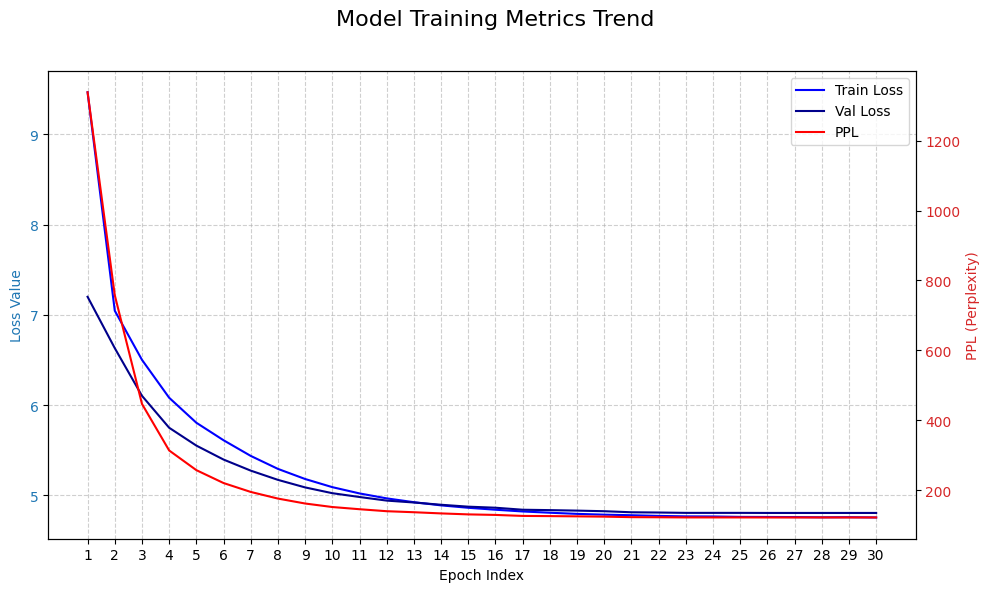

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# --- 設定輸入檔案名稱 ---
CSV_FILE_NAME = 'log_11282341.csv'

# --- 讀取數據 ---
try:
    df = pd.read_csv(CSV_FILE_NAME)
except FileNotFoundError:
    print(f"ERROR: File not found: {CSV_FILE_NAME}")
    print("Please make sure the CSV file is in the same directory.")
    exit()
except Exception as e:
    print(f"ERROR: Failed to read CSV file: {e}")
    exit()

# 檢查必要的欄位是否存在
required_columns = ['train_loss', 'val_loss', 'ppl']
if not all(col in df.columns for col in required_columns):
    print(f"ERROR: CSV must contain the following columns: {required_columns}")
    exit()

# 創建 Epoch 索引 (從 1 開始) 作為 X 軸
df['Epoch_Index'] = df.index + 1 
epochs = df['Epoch_Index']


# --- 繪圖設定與執行 (使用雙 Y 軸) ---
fig, ax1 = plt.subplots(figsize=(10, 6))
fig.suptitle('Model Training Metrics Trend', fontsize=16)

# 設定 X 軸: 使用 Epoch_Index
ax1.set_xlabel('Epoch Index')
ax1.set_xticks(epochs)
ax1.grid(True, linestyle='--', alpha=0.6, axis='x')


# --- Y1 軸 (Losses) ---
color_loss = 'tab:blue'
ax1.set_ylabel('Loss Value', color=color_loss)
ax1.tick_params(axis='y', labelcolor=color_loss)
ax1.grid(True, linestyle='--', alpha=0.6, axis='y')

# 繪製 Loss 數據 (無 marker)
line1 = ax1.plot(epochs, df['train_loss'], linestyle='-', color='blue', label='Train Loss')
line2 = ax1.plot(epochs, df['val_loss'], linestyle='-', color='darkblue', label='Val Loss')


# --- Y2 軸 (PPL) ---
# 創建第二個 Y 軸 (PPL)
ax2 = ax1.twinx()  
color_ppl = 'tab:red'
ax2.set_ylabel('PPL (Perplexity)', color=color_ppl) 
ax2.tick_params(axis='y', labelcolor=color_ppl)

# 繪製 PPL (無 marker)
line3 = ax2.plot(epochs, df['ppl'], linestyle='-', color='red', label='PPL')


# 統一圖例 (Legend)
lines = line1 + line2 + line3
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right')

# 確保標籤不會被裁剪
fig.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

# 輸出結果 (依照您的要求移除中文)
# print(df)